In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
path = "C:/Users/Camer/OneDrive/desktop/College/Digital Tools/DigitalTools_project/research_project/src/data/"

In [55]:
LIBOR = pd.read_csv(path + "LIBOR.csv")
BTC = pd.read_csv(path + "BTC-USD.csv")


# format dates
LIBOR['Date'] = pd.to_datetime(LIBOR['Date'], format='%m/%d/%Y')
BTC['Date'] = pd.to_datetime(BTC['Date'], format='%Y/%m/%d')

LIBOR['Close'] = pd.to_numeric(LIBOR['Close'].str.replace("%",""))

#Set dates as key
LIBOR = LIBOR.set_index('Date',drop=True)
BTC = BTC.set_index('Date',drop=True)

Filter the data so the dates are matching

In [56]:
data = pd.merge(BTC['Adj Close'],LIBOR['Close'],left_index=True,right_index=True)
data.columns = ['BTC','LIBOR']

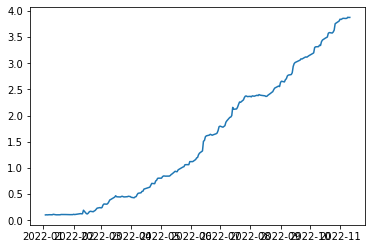

In [41]:
plt.plot(data.LIBOR)

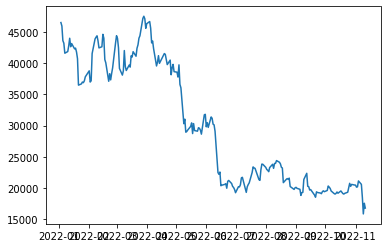

In [42]:
plt.plot(data.BTC)

In [30]:
data.corr()

,BTC,LIBOR
BTC,1.000000,-0.896524
LIBOR,-0.896524,1.000000


Compare SOFR MA and BTC

In [51]:
SOFR = pd.read_csv(path + "SOFR 2018 2022.csv",delimiter=";")
SOFR['Date'] = pd.to_datetime(SOFR['Effective Date'], format='%m/%d/%Y')

SOFR['MA'] = pd.to_numeric(SOFR['30-Day Average SOFR'].str.replace(",","."))

SOFR = SOFR.set_index('Date',drop=True)

In [43]:
data = pd.merge(BTC['Adj Close'],SOFR['MA'],left_index=True,right_index=True)
data.columns = ['BTC','SOFR']

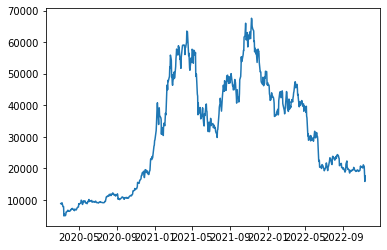

In [44]:
plt.plot(data.BTC)

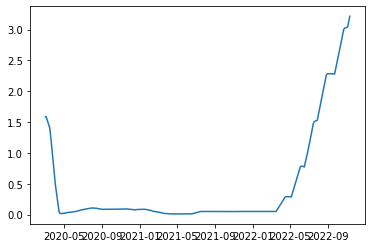

In [45]:
plt.plot(data.SOFR)

Compare all three

In [57]:
data = pd.merge(data,SOFR['MA'],left_index=True,right_index=True)

In [59]:
data.corr()

,BTC,LIBOR,MA
BTC,1.000000,-0.897306,-0.868388
LIBOR,-0.897306,1.000000,0.989764
MA,-0.868388,0.989764,1.000000
